In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("time_series_covid19_confirmed_global.csv")

In [4]:
# Choose a country (change as needed)
country = "Pakistan"

# Filter and sum across provinces (if any)
country_data = df[df["Country/Region"] == country].iloc[:, 4:].sum()

In [5]:
country_data.index = pd.to_datetime(country_data.index)
country_data = country_data.astype(int)

C:\Users\reete\AppData\Local\Temp\ipykernel_11392\886257893.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  country_data.index = pd.to_datetime(country_data.index)


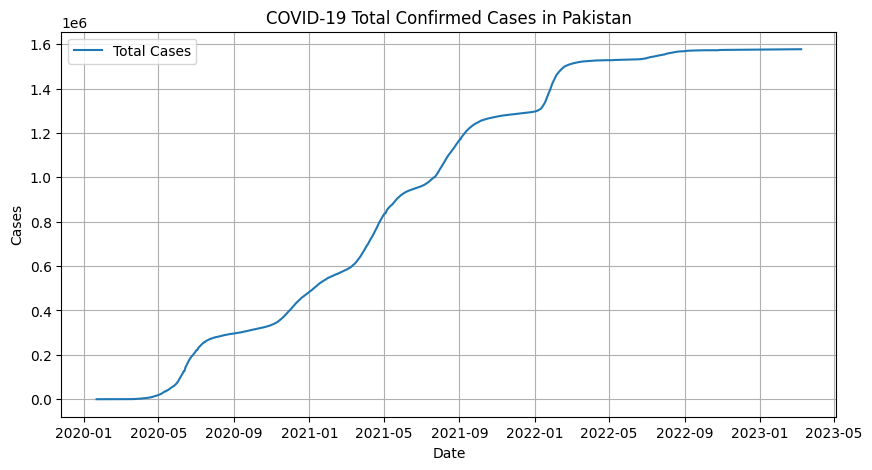

In [6]:
# Plot total confirmed cases
plt.figure(figsize=(10,5))
plt.plot(country_data.index, country_data.values, label="Total Cases")
plt.title(f"COVID-19 Total Confirmed Cases in {country}")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.show()

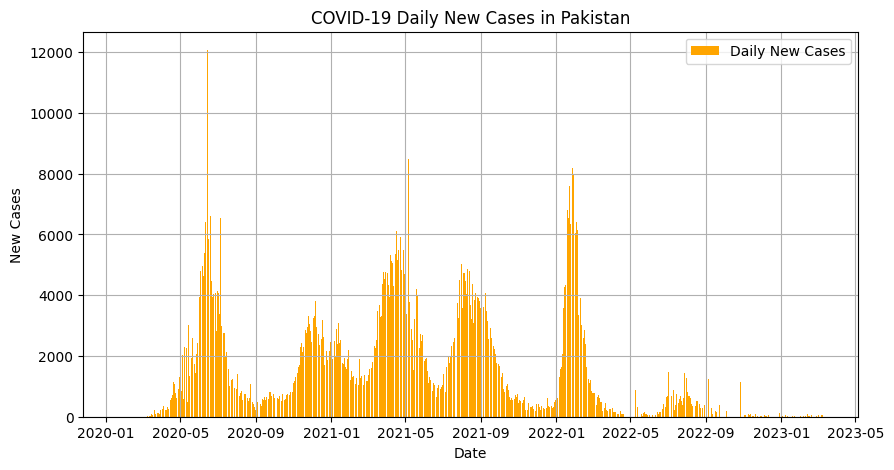

In [7]:
daily_cases = country_data.diff().fillna(0)

plt.figure(figsize=(10,5))
plt.bar(daily_cases.index, daily_cases.values, label="Daily New Cases", color="orange")
plt.title(f"COVID-19 Daily New Cases in {country}")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.show()

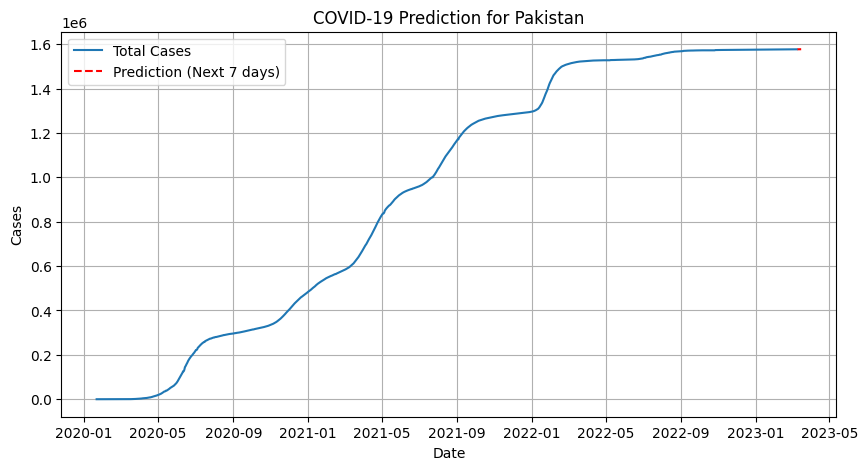

In [8]:
avg_new_cases = daily_cases.tail(7).mean()
future_dates = pd.date_range(start=country_data.index[-1] + pd.Timedelta(days=1), periods=7)
future_cases = [country_data.iloc[-1] + avg_new_cases * (i+1) for i in range(7)]

# Plot prediction
plt.figure(figsize=(10,5))
plt.plot(country_data.index, country_data.values, label="Total Cases")
plt.plot(future_dates, future_cases, "--", label="Prediction (Next 7 days)", color="red")
plt.title(f"COVID-19 Prediction for {country}")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.show()